<h1 style="color:#D30982;">Advanced Features of qBraid Lab</h1>

Now we come to introducing some of the more recent features added to qBraid Lab to elevate the development/research experience. Some of these features are free (qBraid-sdk, code-snippets), some require certain levels of subscription (share environments/notebooks, omnisearch), and others are in closed beta (GPU-integration). For all participants in the IEEE QCE23 tutorial, we are providing limited access to all of these features at no cost. Simply enter the code 'XXXXXX' at https://account.qbraid.com/account-details and then open a lab instance.

In this notebook, you will explore: <br>
1. <a href="#qbraid-sdk">Instructions on how to use the recently open-sourced qBraid-sdk to do cross-framework abstraction, transpilation, and execution of quantum programs. If interested, you are encouraged to participate in the open-source community development of the qBraid-sdk here -> https://github.com/qBraid/qBraid</a> <br>
2. <a href="#code-snippets">Instructions on how to utilize code snippets.</a> <br>
3. <a href="#sharing-environments-and-notebooks">Instructions on how to share environments and notebooks for more seamless collaboration.</a> <br>
4. <a href="#GPU-integration">Instructions on how to utilize GPU-acceleration in quantum workflows.</a> <br>

<h2> qBraid-SDK </h2> <a name="qbraid-sdk"></a>


In [4]:
# Construct a quantum program of any supported program type:

from qbraid import QPROGRAM_LIBS
from qbraid.interface import random_circuit

print("Avaliable quantum libraries: " + str(QPROGRAM_LIBS))

Avaliable quantum libraries: ['braket', 'cirq', 'qiskit', 'pyquil', 'pytket', 'qasm2', 'qasm3']


In [9]:
circuit = random_circuit("braket", num_qubits=4, depth=4)
print(circuit)

T  : | 0  |1|  2  | 3 |
                       
q0 : -SWAP---ISWAP---C-
      |      |       | 
q1 : -SWAP-T-ISWAP-C-|-
                   | | 
q2 : -Y----S-ISWAP-|-Z-
             |     |   
q3 : -H----X-ISWAP-X---

T  : | 0  |1|  2  | 3 |


Here, you will learn how to use the qBraid SDK to interface with quantum circuit objects accross various frontends. We will demonstrate how to use the transpiler to convert circuits between packages, and highlight a few other circuit-based convenience features.

In [2]:
from qbraid import QPROGRAM_TYPES

for k in QPROGRAM_TYPES:
    print(k)

<class 'braket.circuits.circuit.Circuit'>
<class 'cirq.circuits.circuit.Circuit'>
<class 'qiskit.circuit.quantumcircuit.QuantumCircuit'>
<class 'pyquil.quil.Program'>
<class 'pytket._tket.circuit.Circuit'>
<class 'str'>


In [2]:
from qbraid import circuit_wrapper

qprogram = circuit_wrapper(qiskit_circuit)

NameError: name 'qiskit_circuit' is not defined

In [3]:
from qbraid import QPROGRAM_LIBS
QPROGRAM_LIBS

['braket', 'cirq', 'qiskit', 'pyquil', 'pytket', 'qasm2', 'qasm3']

In [27]:
# Create a random circuit in each of the supported quantum languages
from qbraid.interface import random_circuit

qiskit_circuit = random_circuit("qiskit", num_qubits=2, depth=2)
print(qiskit_circuit)

          ┌───┐
q_0: ──■──┤ S ├
     ┌─┴─┐├───┤
q_1: ┤ H ├┤ Z ├
     └───┘└───┘


In [23]:
cirq_circuit = random_circuit("cirq", num_qubits=2, depth=2)
print(cirq_circuit)

0: ───Z───X───
          │
1: ───────@───


In [11]:
# Suppose you want to take a circuit in one language and turn it into the other. 
# The circuit_wrapper offers a transpile method to do just this!

In [28]:
from qbraid import circuit_wrapper

braket_circuit = circuit_wrapper(qiskit_circuit).transpile("braket")
print(braket_circuit)

T  : |0|1|
          
q0 : -C-S-
      |   
q1 : -H-Z-

T  : |0|1|


In [ ]:
# You can also submit jobs to quantum computers directly using the qBraid-SDK.

In [2]:
!qbraid jobs enable qbraid_sdk

You have already enabled qBraid Quantum Jobs in the qbraid_sdk environment.


In [29]:
from qbraid import get_devices

get_devices(filters={"architecture": {"$regex": "superconducting"}, "vendor": "AWS"}) #filter out only superconducting devices on AWS

In [30]:
# let's define a simple Bell circuit using qiskit, transpile it to Braket, and show how easy it is to submit to multiple devices.
from qiskit import QuantumCircuit

def bell():
    circuit = QuantumCircuit(2)
    circuit.h(0)
    circuit.cx(0,1)
    return circuit

In [31]:
from qbraid import device_wrapper

jobs  = []

qbraid_ids = ['aws_oqc_lucy', 'aws_rigetti_aspen_m3']

qiskit_bell_circuit = bell()
print(qiskit_bell_circuit)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


In [32]:
from qbraid import circuit_wrapper

braket_bell_circuit = circuit_wrapper(qiskit_bell_circuit).transpile("braket")
print(braket_bell_circuit)

T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


In [11]:
for device in qbraid_ids:
    qdevice = device_wrapper(device)
    qjob = qdevice.run(braket_bell_circuit, shots=1000)
    jobs.append(qjob)

In [33]:
from qbraid import get_jobs

get_jobs(filters={"numResults": 2})

Progress: [....................] 100% Done


KeyboardInterrupt: 

In [ ]:
print("{:<20} {:<20}".format('Device','Counts'))

for i, job in enumerate(jobs):
    result = job.result()
    counts = result.measurement_counts()
    print("{:<20} {:<20}".format(qbraid_ids[i],str(counts)))

Device               Counts              


<h2> Code Snippets </h2> <a name="code-snippets"></a>


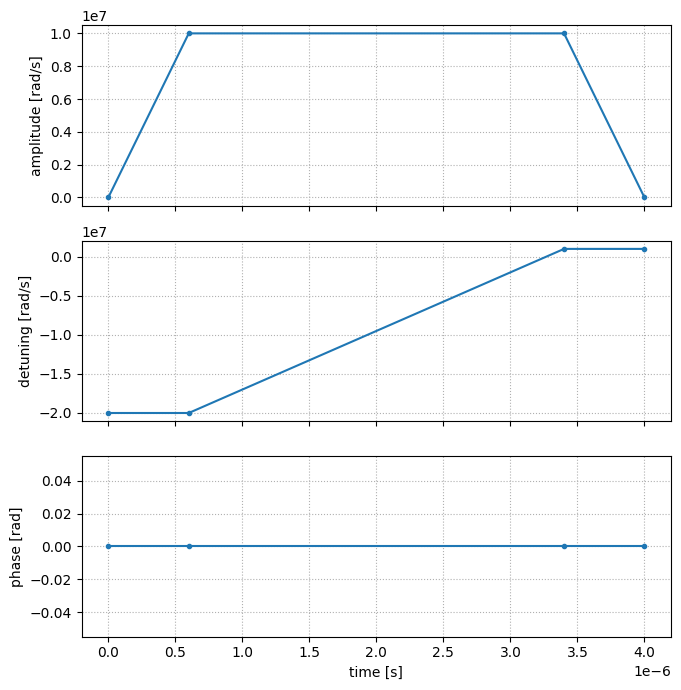

In [2]:
# Suppose that I wanted to start writing an Analog Hamiltonian Program for QuEra's Aquila.
# Just search 'Aquila' in code snippets and we find the following:

# Define a set of time points
time_points = [0, 0.6e-6, 3.4e-6, 4e-6]

# Define the strength of the transverse field Ω
amplitude_min = 0
amplitude_max = 10e6  # rad / sec

# Define the strength of the detuning Δ
Delta_initial = -20e6     # rad / sec
Delta_final = 1e6 # Defined above

# Define the total drive
from quera_ahs_utils.plotting import show_register, show_global_drive, show_final_avg_density
from quera_ahs_utils.drive import get_drive 

amplitude_values = [amplitude_min, amplitude_max, amplitude_max, amplitude_min]  # piecewise linear
detuning_values = [Delta_initial, Delta_initial, Delta_final, Delta_final]  # piecewise linear
phase_values = [0, 0, 0, 0]  # piecewise constant


# Define the drive
drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
show_global_drive(drive);

##### You can create your own private code snippets and/or make them public for everyone to enjoy!

<h2> Sharing notebooks and environments </h2> <a name="sharing-envs-nbs"></a>


##### Suppose you're working on a project with another person or group of people and you have a notebook and corresponding environment

##### With qBraid Lab, you can share your notebook which will create a link that copies your file to the other users file system when they use it.


##### You can also create an environment and share that using the other user's email. It will automatically show up on their environment manager, where they can directly install the environment.

<h2> GPU-acceleration </h2> <a name="gpu-acceleration"></a>


##### A brand new feature on qBraid lab is the ability to start GPU-enabled instances using Nvidia V100s or A100s. These are not widely available at the moment but will be available to you for the day if you enter this (IEEEQCE23) code on qBraid Lab.

##### As opposed to the lengthy and complicated process of setting up a GPU for usage on a personal computer, once you start a GPU-enabled instance on qBraid Lab, a large set of quantum software will 'just work'.

##### For example, we can run a GPU-accelerated simulation of a random circuit below by simply specifying the GPU backend for Qiskit.

In [1]:
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import *
import time

from qiskit import *
from qiskit.circuit.library import *
from qiskit.providers.aer import *

sim = AerSimulator(method='statevector', device='GPU')

qubits = 29
depth=100
shots = 100

circuit = QuantumVolume(qubits, depth, seed=0)
circuit.measure_all()
circuit = transpile(circuit, sim)
result = sim.run(circuit,shots=shots,seed_simulator=12345).result()

print("GPU sim with ThrustGPU:{0} qubits Quantum Volume, Simulation Time = {1} sec".format(qubits,result.to_dict()['results'][0]['time_taken']))
counts = result.get_counts()
print(counts)

RuntimeError: Simulation device "GPU" is not supported on this system